![svm](https://i.ibb.co/T8wFPdH/svm-kaggle.png)

- **ML Part 1** - Logistic Regression
- **ML Part 2** - K-Nearest Neighbors (KNN)
- **ML Part 3 - Support Vector Machine (SVM)**
- **ML Part 4** - Artificial Neural Network (NN)
- **ML Part 5** - Classification and Regression Tree (CART)
- **ML Part 6** - Random Forests
- **ML Part 7** - Gradient Boosting Machines (GBM)
- **ML Part 8** - XGBoost
- **ML Part 9** - LightGBM
- **ML Part 10** - CatBoost


The Support Vector machine is a type of ML technique that can be used for both classification and regression. There are two main types to support linear and nonlinear problems. Linear SVM has no kernel and finds linear solution to the problem with minimal margin. Core SVM is used when the solution is not linearly separable.


## Basic Theory
Support Vector Machine, text classification, image classification, bioinformatics etc. It is a supervised learning technique widely used in the fields.
A hyperplane is derived by the model that maximizes the classification margin. If N features are present, the hyperplane will be an N-1 dimensional subspace. Boundary nodes in feature space are called support vectors. Based on their relative position, the maximum margin is derived and an optimal hyperplane is drawn at the midpoint.

![](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

The value of the margin (m), || w || will be inversely proportional to; where w is the set of weight matrices. To maximize the margin, || w || We'll have to minimize. Optimization problem,

![](https://i.ibb.co/TgrvCft/optimizasyon.jpg)

The above optimization works well for fully linear separable solutions. To handle outliers, we need a loose term as below. The second term uses hinge loss to get slack variable.

![](https://i.ibb.co/ZKmqy58/hinge.jpg)

C is the regularity parameter that balances the missed penalty and margin width. Since the mathematical explanations are far beyond the scope of this story, I will not explain them in depth.


The basic logic is that in order to minimize the cost function, w is forced to adjust with maximum margin between classes. The value of C will decide the level of regularity applied on the data sets. It decides the level (soft / hard) margin to be applied on the data sets. In short, C is the level of ignorance towards outliers.

N linear SVM when the dataset is not linearly separable. A kernel function is used to derive a new subplane for all training data. The distribution of the tags in the new sub plane will be such that the training data is linearly separable. Next, a linear curve will classify the labels on the lower plane. When the classification results are reflected back to the feature space, we get a nonlinear solution.

![](https://i.ibb.co/n3NbrxR/Ek-A-klama-2020-08-29-113927.jpg)

The only change in the equation here is to describe a new kernel function. The new equation will look like this:

![](https://i.ibb.co/X28y1vG/Ek-A-klama-2020-08-29-114044.jpg)

Xi will be replaced by ϕ (xi), which will transform the data set into the new hyperplane.

## Loss Function

The loss function in Eq. 1 can be divided into two parts as follows:

![](https://i.ibb.co/xS7bKJ6/Ek-A-klama-2020-08-29-114318.jpg)

The first term tries to minimize w parameters and get high margin. The second term refers to loss of hinge. Calculates the slack variable for each data set. If any data set comes between the margin or the wrong side, the hinge loss will be penalized.

The reduction of the first term causes the broadening of the margin to decrease and widen. Minimizing the second term results in shortening of the margin to reduce hinge loss. Based on the value of C, we finally set a fixed margin. The value of C determines a soft / hard margin on the curve.

![](https://i.ibb.co/y86PbbY/Ek-A-klama-2020-08-29-114457.jpg)

In the above diagram, he is clear about the effects of C in deriving margin.
Gaussian kernel, polynomial kernel, Sigmoid kernel, Laplace RBF kernel etc. in nonlinear kernels. We can use.


## Advantages
- SVM uses kernel number to solve complex solutions.
- SVM uses a convex optimization function whose global minimum is always achievable.
- Hinge (hinge) loss provides higher accuracy.
- Outliers can be handled well using the soft margin constant C.


## Disadvantages
- Loss of hinge (hinge) leads to sparseness.
- Hyper parameters and cores must be carefully tuned for adequate accuracy.
- Longer training time for larger data sets.


## Hyperparameters
- **Soft Margin Constant (C):**
    - It is a hyperparameter that decides the level of penalty on outliers. It is the reverse of the regularization parameter. When C is large, Outliers will be given a high penalty and a stiff margin will be created. When C is small, outliers are neglected and the margin is large.
- **The degree of the polynomial in the Polynomial Kernel (d):**
    - When d = 1, it is equivalent to a linear core. When D is higher, the core is flexible enough to distinguish complex patterns by projecting them onto a new hyperplane.

- **Width Parameter (γ) in Gaussian Kernel:**
    - Gamma decides the width of the Gaussian curve. The width increases with the increase of gamma.

## Comparison with Other Models

### SVM vs Decision Trees
- While Random Forest supports multi-class classification, SVM needs more than one model for this.
- Random Forest may give a probability on the forecast whereas SVM cannot.
- Random Forest handles categorical data better than SVM.

### SVM vs Naive Bayes
- Both perform better with little training data and large features.
- SVM outperforms Naive Bayes if features are mutually dependent.
- SVM is a distinctive model while NB is a productive model.

### SVM vs Artificial Neural Networks (NN)
- SVM has a convex optimization function whereas NN can hang at the local minimum.
- SVM can outperform NN when there is limited training data and many features. NN needs large training data for sufficient accuracy.
- Multi-class classification requires multiple models for SVM, while NN can do this with a single model.

## Coding Time

![](https://ac-cdn.azureedge.net/infusionnewssiteimages/agingcare/21e637ea-aa74-4ae2-b278-181d2cded7a3.jpg)

In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and read dataset

input_ = "../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(input_)
df = data.copy()

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
inp_data = data.drop(data[['DEATH_EVENT']], axis=1)
out_data = data[['DEATH_EVENT']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

In [5]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


In [6]:
# basic method
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7500
SVC f1-score  : 0.6154
SVC precision : 0.4800
SVC recall    : 0.8571

               precision    recall  f1-score   support

           0       0.94      0.72      0.81        46
           1       0.48      0.86      0.62        14

    accuracy                           0.75        60
   macro avg       0.71      0.79      0.72        60
weighted avg       0.83      0.75      0.77        60



In [7]:
# find best parameters with SVC | Step 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
clf.fit(X_train, y_train) 
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [8]:
clf = SVC(C=10, gamma=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8000
SVC f1-score  : 0.7143
SVC precision : 0.6000
SVC recall    : 0.8824

               precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.60      0.88      0.71        17

    accuracy                           0.80        60
   macro avg       0.77      0.82      0.78        60
weighted avg       0.85      0.80      0.81        60



In [9]:
# find best parameters with SVC | Step 2
kernels = list(['linear'])
c = list([5,10,15,20,25,30])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
clf.fit(X_train, y_train) 
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5, 'gamma': 0.05, 'kernel': 'linear'}

In [10]:
clf = SVC(C=5, gamma=0.05, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8167
SVC f1-score  : 0.7317
SVC precision : 0.6000
SVC recall    : 0.9375

               precision    recall  f1-score   support

           0       0.97      0.77      0.86        44
           1       0.60      0.94      0.73        16

    accuracy                           0.82        60
   macro avg       0.79      0.86      0.80        60
weighted avg       0.87      0.82      0.83        60



## After the SMOTE process

In [11]:
from imblearn.over_sampling import SMOTE

sms = SMOTE(random_state=12345)
X_res, y_res = sms.fit_sample(inp_data, out_data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (324, 12)
X_test Shape  :  (82, 12)
y_train Shape :  (324, 1)
y_test Shape  :  (82, 1)


In [12]:
# find best parameters with SVC | Step 2
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([20,25,30,35,40,45,50])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 30, 'gamma': 0.08, 'kernel': 'rbf'}

In [13]:
clf = SVC(C=30, gamma=0.08, kernel='rbf') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8780
SVC f1-score  : 0.8780
SVC precision : 0.8780
SVC recall    : 0.8780

               precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.88      0.88      0.88        41

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



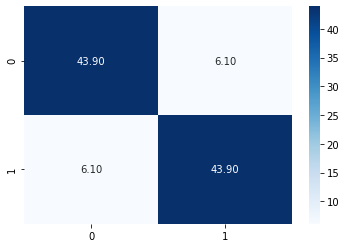

In [14]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

## Reporting

I evaluated the results I found with Confusion Matrix, the results are as follows:

**Correctly predicted -> %89.02 (361 of 406 predict are correct)**
- True Negative -> %42.68 -> Those who were predicted not to die and who did not die
- True Positive -> %46.34 -> Those who were predicted to die and who did die

**Wrong predicted-> %10.98 (45 of 406 predict are wrong)**
- False Positive -> %03.66 -> Those who were predicted to die but who did not die
- False Negative -> %07.32 -> Those who were predicted to not die but who did die

As a sanity check, let’s do 500 rounds of random sampling and assess the stability of our model:

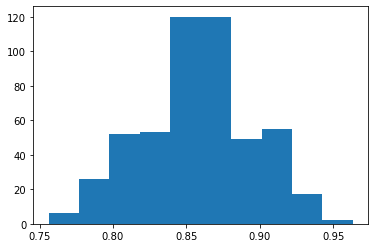

In [15]:
scores = [] 
for i in range(0,500): 
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
    clf = SVC(kernel='rbf', C=30, gamma=0.08) 
    clf.fit(X_train, y_train)
    scores.append(accuracy_score(clf.predict(X_test), y_test)) 

plt.hist(scores)
plt.show()